In [2]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances
import sys
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import pylab
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
pd.set_option('display.max_columns', 500)
%matplotlib inline

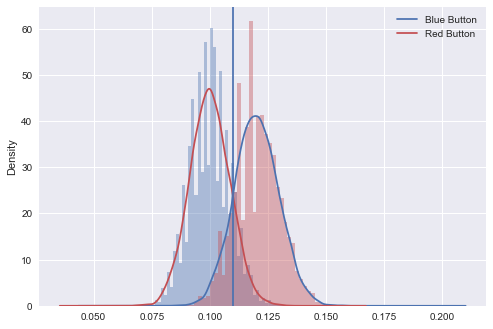

In [4]:
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)

# Set number of observations.
n_R=1200
n_B=1200

# Set conversion rates of observations.
p_R=0.1
p_B=0.12

# Set number of samples to take
samples=10000

# Sample from red and blue butotn given observed conversion rates. 
x_R = np.random.binomial(n_R, p_R, samples)/n_R
x_B = np.random.binomial(n_B, p_B, samples)/n_B

# Create pandas series
x_R=pd.Series(x_R)
x_B=pd.Series(x_B)

# Plot the results. 
x_B.plot(kind='kde',label='Blue Button',color='b')
x_R.plot(kind='kde',label='Red Button',color='r')
sns.distplot(x_R,kde=False,norm_hist=True)
sns.distplot(x_B,kde=False,color='r',norm_hist=True)


x_position = 0.11
plt.axvline(x_position)
plt.legend()

In [12]:
import scipy.stats as st
def p_value(p_T,p_C,size_T,size_C):
    var = np.sqrt(p_T*(1-p_T)/size_T + p_C*(1-p_C)/size_C)
    diff = p_T-p_C
    z_score = diff/var
    p_value = st.norm.sf(abs(z_score))
    return diff, p_value
p_values=[]
diffs=[]

In [8]:
p_R = np.mean(x_R)
p_B = np.mean(x_B)

In [9]:
p_R

0.10000258333333333

In [10]:
p_B

0.12012858333333333

In [13]:
p_value(p_R,p_B,n_R,n_B)

(-0.020126000000000005, 0.057514274514601157)

$$ N \geq 5.44\frac{\sigma^2}{\alpha^2} $$

Let's say we want to see a 1% lift.

In [42]:
p_conv = [1/N for N in range(10,100)]
sigma = [np.sqrt(p*(1-p)) for p in p_conv]
alphas = [1.1*p for p in p_conv]
N_vals = [5.44*(p*(1-p))/((0.01*p)**2) for p in p_conv]

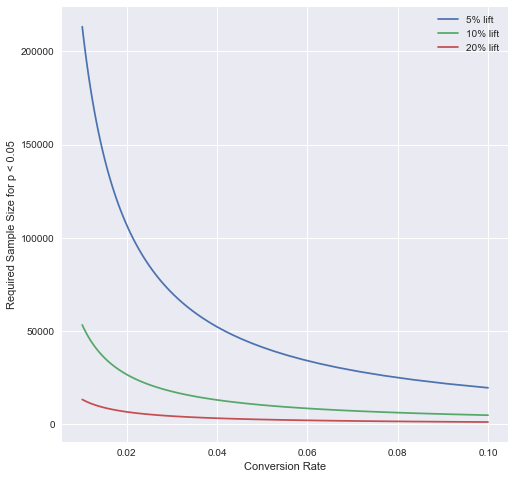

In [45]:
N_vals_1 = [5.44*(p*(1-p))/((0.01*p)**2) for p in p_conv]
N_vals_5 = [5.44*(p*(1-p))/((0.05*p)**2) for p in p_conv]
N_vals_10 = [5.44*(p*(1-p))/((0.10*p)**2) for p in p_conv]
N_vals_20 = [5.44*(p*(1-p))/((0.20*p)**2) for p in p_conv]

plt.figure(figsize=(8,8))
plt.xlabel('Conversion Rate')
plt.ylabel('Required Sample Size for p < 0.05')
plt.plot(p_conv,N_vals_5,label='5% lift')
plt.plot(p_conv,N_vals_10,label='10% lift')
plt.plot(p_conv,N_vals_20,label='20% lift')
plt.legend()